In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')

In [142]:
df_train = pd.read_csv('./train_Insurance.csv')

# 1) Analyse et visualisation

In [143]:
# Inspecter le DataFrame : Voir les 5 premiers lignes
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [144]:
print('Shape of the train DataFrame : ',df_train.shape)

Shape of the train DataFrame :  (5012, 13)


In [145]:
# Vérifier les types des colonnes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [146]:
# Voir les statistiques de toutes les colonnes
df_train.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [147]:
# Voir les colonnes avec des valeurs nulles
df_train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

Les colonnes [ 'Garden' , 'Building Dimension' , 'Geo_Code' ] possèdent des valeurs nulles.

In [148]:
# Total des valeurs nulles
print('Total des valeurs nulles : ',df_train.isna().sum().sum())

Total des valeurs nulles :  154


In [149]:
# voir la distribution de la classe à prédir
df_train['Claim'].value_counts()

Claim
non    3886
oui    1126
Name: count, dtype: int64

<Axes: xlabel='Claim', ylabel='count'>

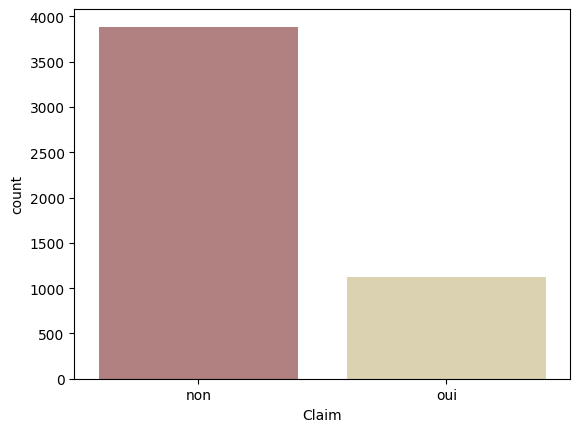

In [150]:
# Can we combine the above metrics in a single plot?
sns.countplot(x='Claim', data=df_train, palette='pink')

In [151]:
# Sur combiens d'années ces données sont collectées ?
df_train['YearOfObservation'].value_counts()

YearOfObservation
2012    1320
2013    1252
2014     973
2015     745
2016     722
Name: count, dtype: int64

L'étude est faite sur 5 ans. de l'année 2012 jusqu'à 2016.

<Axes: xlabel='Claim', ylabel='count'>

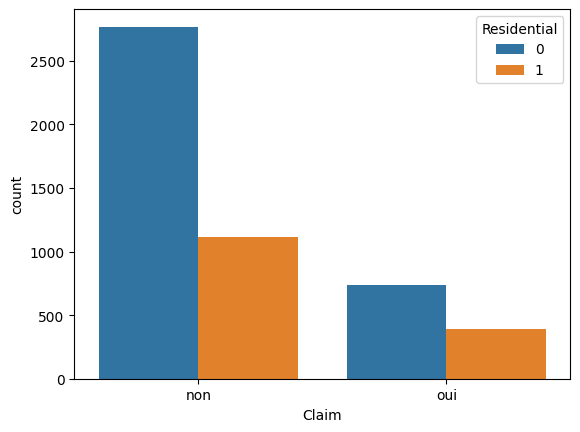

In [152]:
# Voir la relation entre l'année d'observation et la variable classe
sns.countplot(x='Claim', data=df_train, hue ='Residential')

On peut remarquer que la plupart des bâtiments qui ont eu un accident étaient non résidentiels.

<Axes: xlabel='Claim', ylabel='count'>

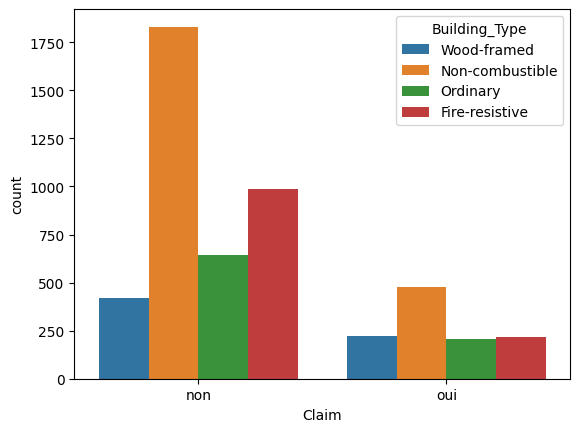

In [153]:
# Voir l'impact du type de batiment sur la variable classe 'Claim'
sns.countplot(x='Claim', data=df_train, hue ='Building_Type')

On remarque que les bâtiments non-combustibles présentent un risque plus élevé d'avoir un accident par rapport aux autres types de bâtiments.

<Axes: xlabel='Claim', ylabel='count'>

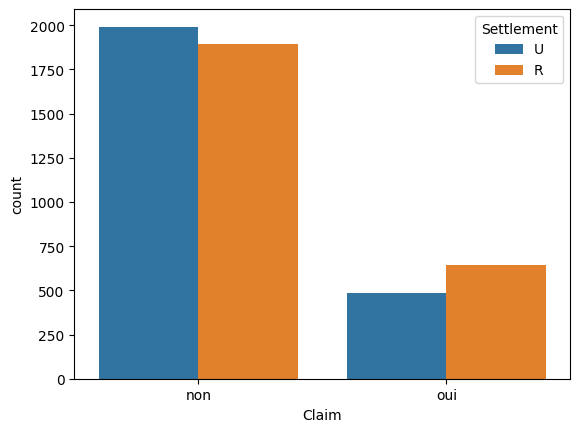

In [154]:
# Voir l'impact de la zone du batiment sur la variable classe 'Claim'
sns.countplot(x='Claim', data=df_train, hue ='Settlement')

Il n'y a pas une grande différence entre l'impact des batiments ruraux et urbains sur les accidents.

# 2. Nettoyage et transformation des Données

In [155]:
print('Il y a ',df_train['Garden'].isna().sum(), ' valeurs nulles dans la colonne [Garden].')

Il y a  4  valeurs nulles dans la colonne [Garden].


In [156]:
# Suppression des valeurs nulles de la colonne "Garden"
df_train.dropna(subset=["Garden"], inplace=True )

4 lignes représentent 0.07% du données de la DataFrame. On peut les supprimer sans avoir affecter le résultat de notre étude.

In [157]:
df_train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

<Axes: xlabel='Building Dimension'>

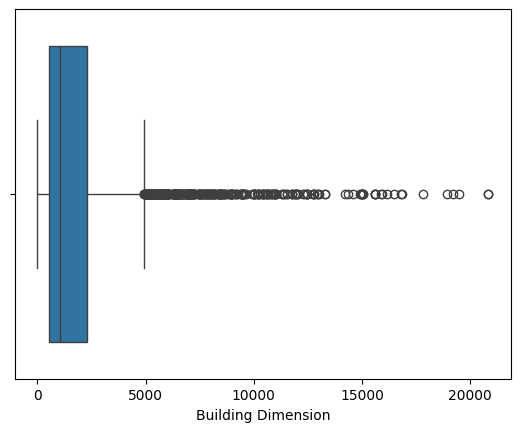

In [158]:
# vérifier les outliers de la colonne [Building Dimension]
sns.boxplot(data=df_train, x='Building Dimension')

La colonne "Building Dimension" contient des outlliers donc on utilise la stratégie "Median" pour remplire les valeurs manquantes.

In [159]:
# la stratégie Médiane est robuste aux valeurs aberrantes et 
# convient aux données présentant une distribution asymétrique.
df_train['Building Dimension'] = df_train['Building Dimension'].fillna(df_train['Building Dimension'].median())

In [160]:
#Traitement des outliers
Q1,Q3=np.percentile(df_train["Building Dimension"],[25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

outliers=df_train["Building Dimension"][(df_train["Building Dimension"]>upper_limit)|(df_train["Building Dimension"]<lower_limit)]

df_train['Building Dimension']=np.where(df_train['Building Dimension']>=upper_limit, upper_limit, np.where(df_train['Building Dimension']<=lower_limit, lower_limit,df_train['Building Dimension']))


Text(0.5, 1.0, 'Vérification des Outliers aprés traitement')

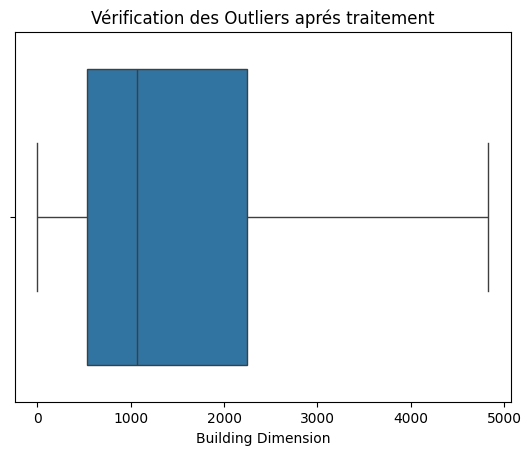

In [161]:
# vérifier les outliers de la colonne [Building Dimension]
sns.boxplot(data=df_train, x='Building Dimension')
plt.title('Vérification des Outliers aprés traitement')

In [162]:
# Remplissaege des valeurs manquantes de "Geo_Code" par la stratégie "Most frequent"
df_train['Geo_Code'] = df_train['Geo_Code'].fillna(df_train['Geo_Code'].mode()[0])

In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5008 non-null   object 
 1   YearOfObservation   5008 non-null   int64  
 2   Insured_Period      5008 non-null   float64
 3   Residential         5008 non-null   int64  
 4   Building_Painted    5008 non-null   object 
 5   Building_Fenced     5008 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5008 non-null   object 
 8   Building Dimension  5008 non-null   float64
 9   Building_Type       5008 non-null   object 
 10  NumberOfWindows     5008 non-null   object 
 11  Geo_Code            5008 non-null   object 
 12  Claim               5008 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 547.8+ KB


In [164]:
df_train.isna().sum().sum()
print("Pas de valeurs manquantes dans la DataFrame")

Pas de valeurs manquantes dans la DataFrame


In [165]:
#Vérification des lignes dupliquées
df_duplicated=df_train[df_train.duplicated()]
df_duplicated.shape


(0, 13)

In [166]:
a =df_train.iloc[:,1:13]
a[a.duplicated()].shape

(47, 12)

In [167]:
a.duplicated().sum()

47

On doit supprimer la colonne "Customer Id" pour détecter les lignes dupliquées.

In [168]:
#Suppression de la colonne "Customer Id"
df_train = df_train.drop('Customer Id', axis=1)
#Suppression des lignes duppliquées
df_train.drop_duplicates(inplace=True, ignore_index=True)

In [169]:
#Voir les valeurs possibles de la colonne "NumberOfWindows"
df_train["NumberOfWindows"].value_counts()

NumberOfWindows
without    2439
4           664
3           597
5           434
2           245
6           224
7           141
8            82
>=10         51
1            49
9            35
Name: count, dtype: int64

Ily a des valeurs non numériques dans cette colonne ["Without" , ">=10"] . On doit les transformer en des valeurs numériques

In [170]:
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].str.replace("without","0")
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].str.replace(">=10","10")
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].astype('int64')

In [171]:
df_train["NumberOfWindows"].value_counts()

NumberOfWindows
0     2439
4      664
3      597
5      434
2      245
6      224
7      141
8       82
10      51
1       49
9       35
Name: count, dtype: int64

## 3. Selection des descripteurs

On a supprimé la colonne "Customer Id" pour avoir détecter les lignes dupliquées. En plus, cette colonne n'affecte pas le résultat de la colonne à prédire "Claim"

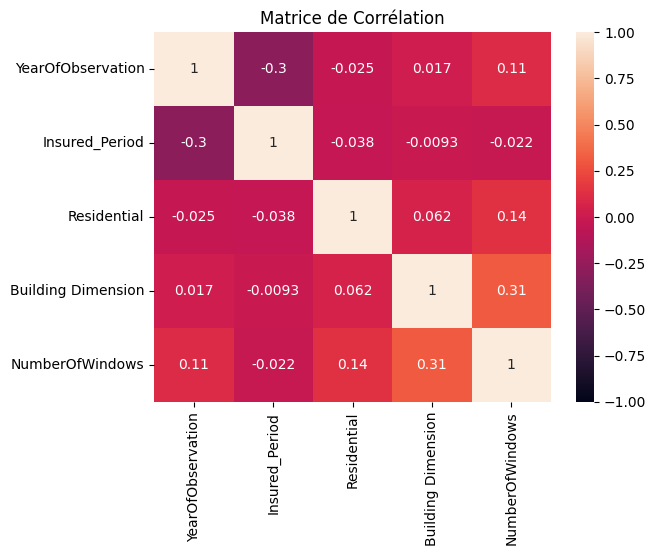

In [172]:
correlation = df_train.corr(numeric_only= True)
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


In [173]:
df_train = df_train.drop('Geo_Code',axis=1)

In [174]:
df_train[df_train.duplicated()].shape

(301, 11)

In [175]:
df_train.drop_duplicates(inplace=True)

## 4. Encodage

On va changer les variables catégoriales en des variables numériques

In [176]:
# encodes les variables des colonnes "Building_Painted" , "Building_Fenced", "Garden", "Settlement"
new_vals = {'N':0 ,'V':1, 'O':0, 'R' : 1, 'U':0 }
df_train.iloc[:,[3,4,5,6]]  =  df_train.iloc[:,[3,4,5,6]].applymap(new_vals.get)
df_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2012,1.0,1,0,1,1,0,1240.0,Wood-framed,0,non
1,2012,1.0,0,0,1,1,0,900.0,Non-combustible,0,non
2,2013,1.0,1,1,0,0,1,4830.0,Non-combustible,4,oui
3,2016,0.5,0,0,1,1,0,600.0,Wood-framed,0,oui
5,2016,0.5,0,0,1,1,0,2675.0,Ordinary,0,non


Les valeurs sont encodées mais les colonnes sont de type "Object". On doit les rendre en type numérique 'int64'

In [177]:
# Changer les types en numerique 
df_train['Building_Painted'] = df_train['Building_Painted'].astype('int64')
df_train['Building_Fenced'] = df_train['Building_Fenced'].astype('int64')
df_train['Garden'] = df_train['Garden'].astype('int64')
df_train['Settlement'] = df_train['Settlement'].astype('int64')

Maintenant, on encode la colonne "Claim"

In [178]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Claim'] = label_encoder.fit_transform(df_train['Claim'])


avec le Label Encoder, les valeurs 'non' => 0 et 'oui' => 1

In [179]:
# encoder la colonne "Building_Type" en 4 colonnes en respectant l'ordre
X = df_train.iloc[:,0:-1]
y = df_train['Claim']
X=pd.get_dummies(X, columns=['Building_Type'],dtype='int32',)

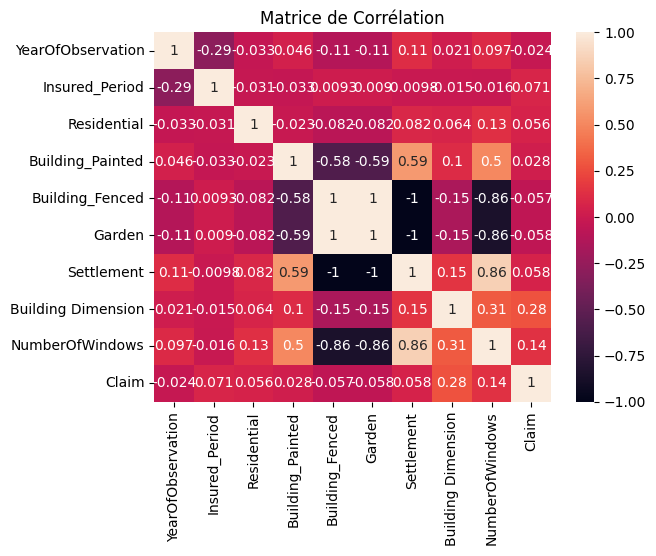

In [180]:
correlation = df_train.corr(numeric_only= True)
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

L'encodage de la colonne "Building_Type" va ajouter 4 colonnes à la fin. On doit réorganiser les colonnes pourque "Claim" sera à la fin.

### Model building

In [182]:
### Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [186]:
log_reg = LogisticRegression(max_iter = 3000,class_weight = 'balanced') #'balanced': Adjust class weights to handle imbalanced classes.
log_reg.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [187]:
randForest = RandomForestClassifier(n_estimators=400, max_depth=3)
randForest.fit(X , y)

RandomForestClassifier(max_depth=3, n_estimators=400)

## 5. Evaluation des modèles

Validation des données d'apprentissage : Decision Tree

Text(0.5, 1.0, "Matrice de confusion des données d'apprentissage du Decision Tree")

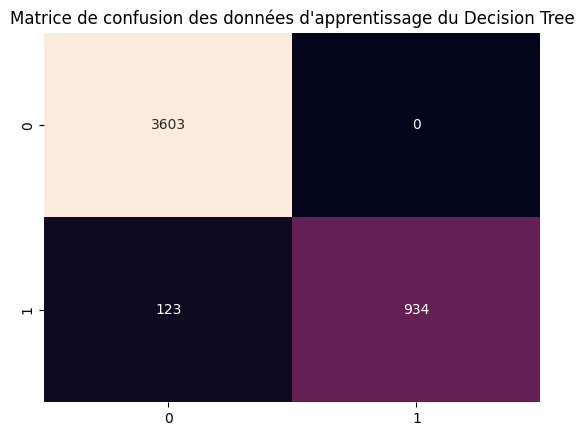

In [184]:
# Validation des données d'apprentissage
y_pred_test_tree = tree.predict(X)
cm_train_tree = confusion_matrix(y , y_pred_test_tree)
sns.heatmap(cm_train_tree, annot=True ,fmt='d', cbar=False,xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.title("Matrice de confusion des données d'apprentissage du Decision Tree")

In [185]:
# Calcul d'accuracy
accuracy = accuracy_score(y, y_pred_test_tree)
print("L'accuracy des données de train : ",accuracy)

L'accuracy des données de train :  0.9736051502145923


Validation des données d'apprentissage : Random Forest

Text(0.5, 1.0, "Matrice de confusion des données d'apprentissage du Random Forest")

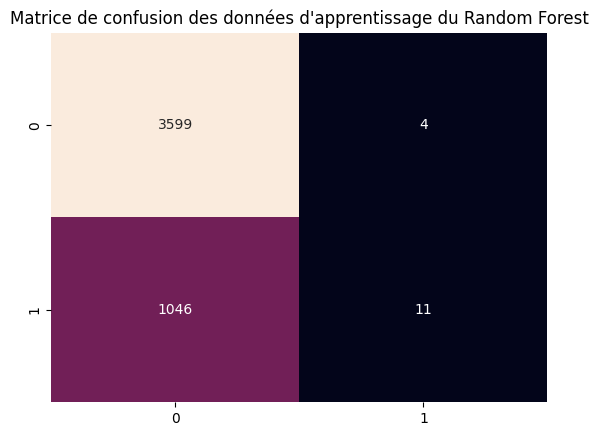

In [188]:
# Validation des données d'apprentissage
y_pred_test_randForest = randForest.predict(X)
cm_train_forest = confusion_matrix(y , y_pred_test_randForest)
sns.heatmap(cm_train_forest, annot=True ,fmt='d', cbar=False,xticklabels=randForest.classes_, yticklabels=tree.classes_)
plt.title("Matrice de confusion des données d'apprentissage du Random Forest")

In [190]:
# Calcul d'accuracy
accuracy = accuracy_score(y, y_pred_test_randForest)
print("L'accuracy des données de train : ",accuracy)

L'accuracy des données de train :  0.7746781115879828


Validation des données d'apprentissage : Logistic Regression

Text(0.5, 1.0, "Matrice de confusion des données d'apprentissage du Logistic Regression")

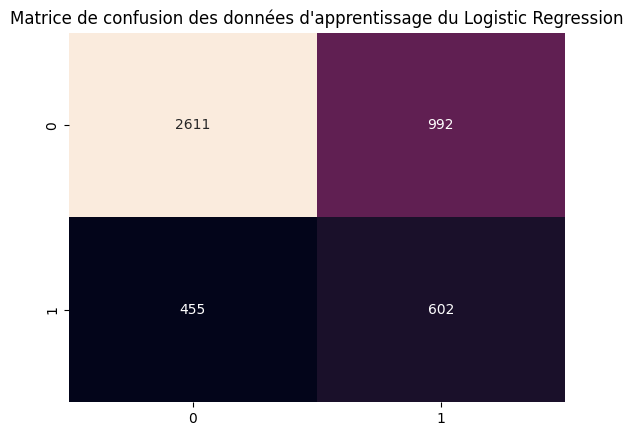

In [191]:
# Validation des données d'apprentissage
y_pred_test_logReg = log_reg.predict(X)
cm_train_tree = confusion_matrix(y , y_pred_test_logReg)
sns.heatmap(cm_train_tree, annot=True ,fmt='d', cbar=False,xticklabels=log_reg.classes_, yticklabels=tree.classes_)
plt.title("Matrice de confusion des données d'apprentissage du Logistic Regression")

In [193]:
# Calcul d'accuracy
accuracy = accuracy_score(y, y_pred_test_logReg)
print("L'accuracy des données de train : ",accuracy)

L'accuracy des données de train :  0.6894849785407725


In [194]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y, y_pred_test_logReg))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78      3603
           1       0.38      0.57      0.45      1057

    accuracy                           0.69      4660
   macro avg       0.61      0.65      0.62      4660
weighted avg       0.74      0.69      0.71      4660



### Evaluation des données de Test

In [195]:
df_test = pd.read_csv("./test_Insurance.csv")
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


On doit faire le meme traitement pour les données du test.

In [196]:
#Suppression des colonnes non descriminantes
df_test = df_test.drop('Customer Id', axis=1)
df_test = df_test.drop('Geo_Code', axis=1)
# encodes les variables des colonnes "Building_Painted" , "Building_Fenced", "Garden", "Settlement"
new_vals = {'N':0 ,'V':1, 'O':0, 'R' : 1, 'U':0 }
df_test.iloc[:,[3,4,5,6]]  =  df_test.iloc[:,[3,4,5,6]].applymap(new_vals.get)

# Changer les types en numerique 
df_test['Building_Painted'] = df_test['Building_Painted'].astype('int64')
df_test['Building_Fenced'] = df_test['Building_Fenced'].astype('int64')
df_test['Garden'] = df_test['Garden'].astype('float64')
df_test['Settlement'] = df_test['Settlement'].astype('int64')
# suppression des valeurs vides (à l'environt 50 lignes )
df_test = df_test.dropna()
# Rendre numériques les valeurs de la colonne "NumberOfWindows"
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].str.replace("without","0")
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].str.replace(">=10","10")
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].astype('int64')

df_test['Claim'] = label_encoder.fit_transform(df_test['Claim'])

#Splitting Test Data into further train and test sets
X = df_test.iloc[:,0:-1]
y = df_test['Claim']
# encoder la colonne "Building_Type" en 4 colonnes.
X=pd.get_dummies(X, columns=['Building_Type'],dtype='int32')


X.head()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed
0,2013,1.0,0,1,1,1.0,0,3760.0,0,1,0,0,0
1,2015,1.0,0,1,0,0.0,1,1452.0,5,1,0,0,0
2,2013,1.0,1,1,0,0.0,1,1944.0,6,0,0,1,0
3,2015,1.0,0,0,1,1.0,0,2270.0,0,0,1,0,0
4,2016,0.5,0,1,0,0.0,1,2976.0,9,1,0,0,0


Test des Modèles par les données d'évaluation

Text(0.5, 1.0, "Matrice de confusion des données d'évaluation du DecisionTree")

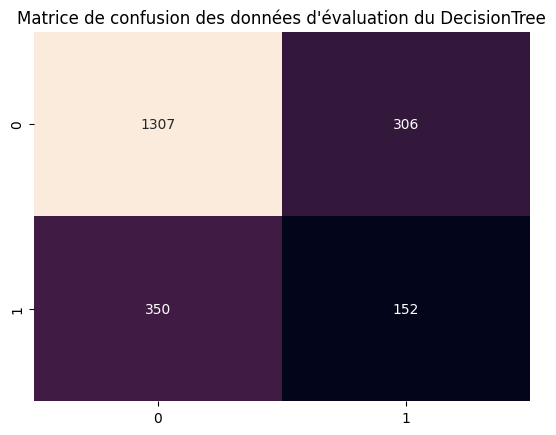

In [197]:
# Decision Tree classifier
eval_pred = tree.predict(X)
cm_train_tree = confusion_matrix(y , eval_pred)
sns.heatmap(cm_train_tree, annot=True ,fmt='d', cbar=False,xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.title("Matrice de confusion des données d'évaluation du DecisionTree")


In [198]:
# Calcul d'accuracy
accuracy = accuracy_score(y, eval_pred)
print("L'accuracy des données de train : ",accuracy)


L'accuracy des données de train :  0.6898345153664303


In [199]:
print("Classification Report:\n", classification_report(y, eval_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1613
           1       0.33      0.30      0.32       502

    accuracy                           0.69      2115
   macro avg       0.56      0.56      0.56      2115
weighted avg       0.68      0.69      0.68      2115



L'accuracy des données de train :  0.7645390070921986


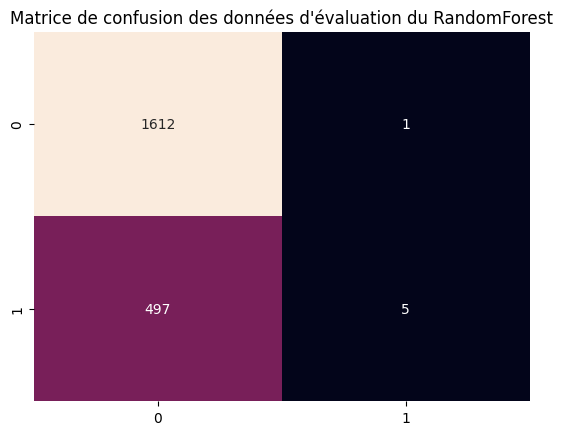

In [200]:
# Random Forest
eval_pred = randForest.predict(X)
cm_train_randForest = confusion_matrix(y , eval_pred)
sns.heatmap(cm_train_randForest, annot=True ,fmt='d', cbar=False,xticklabels=randForest.classes_, yticklabels=randForest.classes_)
plt.title("Matrice de confusion des données d'évaluation du RandomForest")
# Calcul d'accuracy
accuracy = accuracy_score(y, eval_pred)
print("L'accuracy des données de train : ",accuracy)


In [201]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y, eval_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1613
           1       0.83      0.01      0.02       502

    accuracy                           0.76      2115
   macro avg       0.80      0.50      0.44      2115
weighted avg       0.78      0.76      0.67      2115



L'accuracy des données de train :  0.6997635933806147


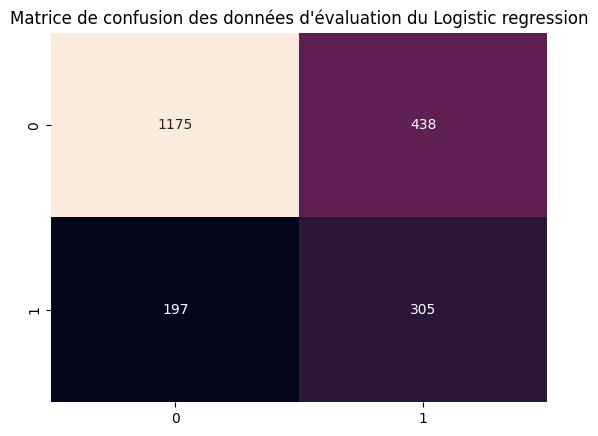

In [202]:
# Logistic regression
eval_pred = log_reg.predict(X)
cm_train_logreg = confusion_matrix(y , eval_pred)
sns.heatmap(cm_train_logreg, annot=True ,fmt='d', cbar=False,xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Matrice de confusion des données d'évaluation du Logistic regression")
# Calcul d'accuracy
accuracy = accuracy_score(y, eval_pred)
print("L'accuracy des données de train : ",accuracy)

In [203]:
print("Classification Report:\n", classification_report(y, eval_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      1613
           1       0.41      0.61      0.49       502

    accuracy                           0.70      2115
   macro avg       0.63      0.67      0.64      2115
weighted avg       0.75      0.70      0.72      2115

